In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scienceplots
plt.style.use(['science', 'no-latex'])

<>:29: SyntaxWarning: invalid escape sequence '\G'
<>:31: SyntaxWarning: invalid escape sequence '\G'
<>:33: SyntaxWarning: invalid escape sequence '\G'
<>:43: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\G'
<>:31: SyntaxWarning: invalid escape sequence '\G'
<>:33: SyntaxWarning: invalid escape sequence '\G'
<>:43: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kschl\AppData\Local\Temp\ipykernel_4224\2170504532.py:29: SyntaxWarning: invalid escape sequence '\G'
  ax.plot(gamma0_time, gamma0_area, 's', ls='--', label=f'${i}\Gamma$: $f_{{AOM}}$ = {d["aom_freq"]}')
C:\Users\kschl\AppData\Local\Temp\ipykernel_4224\2170504532.py:31: SyntaxWarning: invalid escape sequence '\G'
  ax.plot(gamma4_time, gamma4_area, '.', ls='--', label=f'${i}\Gamma$: $f_{{AOM}}$ = {d["aom_freq"]}')
C:\Users\kschl\AppData\Local\Temp\ipykernel_4224\2170504532.py:33: SyntaxWarning: invalid escape sequence '\G'
  ax.plot(d['time'], d['mot_area_mm2'], 'o', ls='--',

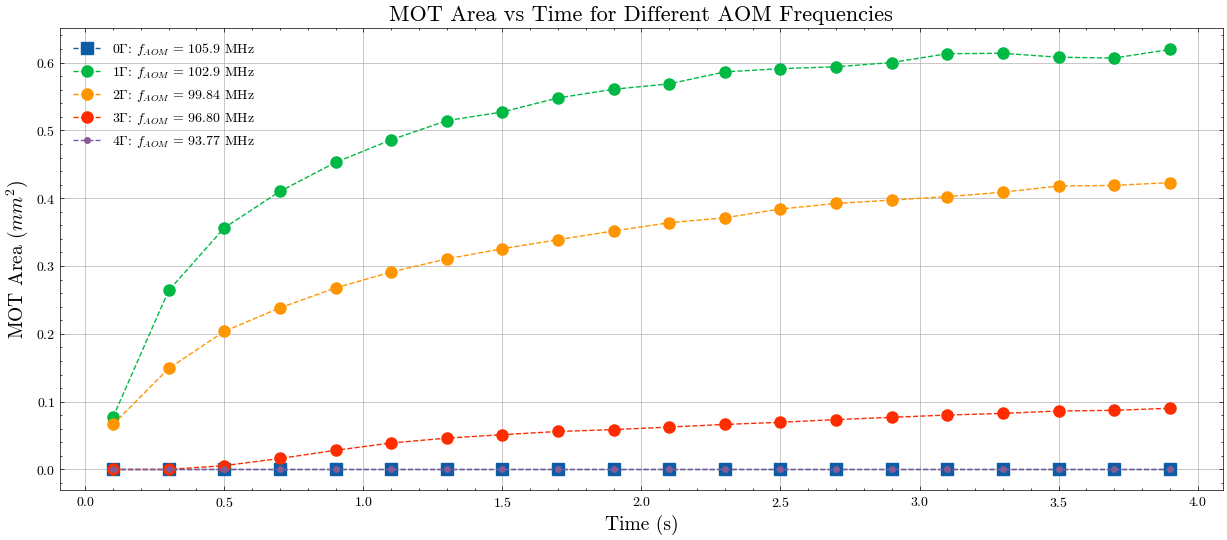

In [75]:
folder = r'Data\Day2\Detunings\growth\npz_files'
#Get each data file within folder
data_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.npz')]
#Load each data file
data = [np.load(file) for file in data_files]

# Append missing data_points for gamma0 and gamma4
# Load arrays as writable copies
gamma0_time = data[0]['time'].copy()
gamma0_area = data[0]['mot_area_mm2'].copy()

# Append new values
gamma0_time = np.append(gamma0_time, np.arange(gamma0_time[-1] + 0.2, 4, 0.2))
gamma0_area = np.append(gamma0_area, np.zeros(10))

# change gamma4 
gamma4_time = data[4]['time'].copy()
gamma4_area = data[4]['mot_area_mm2'].copy()

# Append new values
gamma4_time = np.append(gamma4_time, np.arange(gamma4_time[-1] + 0.2, 4, 0.2))
gamma4_area = np.zeros_like(gamma4_time)

fig, ax = plt.subplots(figsize=(15, 6))
markersize = 8
plt.rcParams['lines.markersize'] = markersize
for i, d in enumerate(data):
    if i == 0:
        ax.plot(gamma0_time, gamma0_area, 's', ls='--', label=f'${i}\Gamma$: $f_{{AOM}}$ = {d["aom_freq"]}')
    elif i == 4:
        ax.plot(gamma4_time, gamma4_area, '.', ls='--', label=f'${i}\Gamma$: $f_{{AOM}}$ = {d["aom_freq"]}')
    else:
        ax.plot(d['time'], d['mot_area_mm2'], 'o', ls='--', label=f'${i}\Gamma$: $f_{{AOM}}$ = {d["aom_freq"]}')

ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('MOT Area ($mm^2$)', fontsize=14)
ax.set_title('MOT Area vs Time for Different AOM Frequencies', fontsize=16)
ax.grid()
# Set legend to the upper left corner
ax.legend(loc='upper left')
# ax.legend()

fig.savefig('Data\Day2\Detunings\growth\mot_size-diff-detunings.png', dpi=500, bbox_inches='tight')
